# Prediksi Tingkat Pengangguran Terbuka (TPT) di Indonesia

In [27]:
# Pendefinisian fungsi dan kelas yang digunakan

In [28]:
# Import library keras dan lain-lain
import numpy as np # For matrix math
from numpy import loadtxt
from keras.models import Sequential
import matplotlib.pyplot as plt # For plotting
import keras
from keras.utils import to_categorical
from keras.layers import Flatten, Dense, Activation
from IPython.display import clear_output

# Normalisasi Data

![normasilisasi_data](normalisasi.jpg)


In [29]:
def normalisasi(x):
    a = np.max(x)
    b = np.min(x)
    for i in x:
        hasil_normalisasi = (0.8 * (x - b))/(a-b) + 0.1
    return hasil_normalisasi

In [30]:
# load the data latih
# Data Tingkat Pengangguran Terbuka (TPT) mulai Tahun 2000 
# sampai dengan Tahun 2023

TPT = loadtxt('data_pengangguran_new.csv', delimiter=',')
TPT_normal = normalisasi(TPT)

TPT_Target = TPT[:,10]
TPT_Target_Uji = TPT[:,11]

# DATA PELATIHAN =================================
# Data dibagi menjadi 10 variabel input (X) dan 1 variabel output (Y)
# Input : mulai tahun 2000 sampai tahun 2019

X = TPT_normal[:,0:10]

# Output : data TPT tahun 2020 dan 2021

Y = TPT_normal[:,10]

# DATA UJI PREDIKSI=================================
# Geser  dua tahun ke depan
# Input : mulai tahun 2002 sampai tahun 2021
# Untuk memprediksi TPT Tahun 2022 dan 2023

X1 = TPT_normal[:,1:11]

# Urut tahun, menggantikan indeks dari 0 s.d 1
urut = [1,
       2
       ]


In [31]:
print(TPT)

[[ 6.08  9.06  9.86 10.36  8.43  7.28  6.25  5.82  5.56  5.2   6.01  5.85]
 [ 8.1   9.67 10.75  9.43  8.01  7.22  6.03  5.99  5.42  5.11  6.38  5.39]]


In [32]:
TPT_normal = normalisasi(TPT)
print(TPT_normal)

[[0.23758865 0.66028369 0.77375887 0.84468085 0.57092199 0.40780142
  0.26170213 0.20070922 0.16382979 0.11276596 0.22765957 0.20496454]
 [0.52411348 0.74680851 0.9        0.71276596 0.51134752 0.39929078
  0.23049645 0.2248227  0.14397163 0.1        0.28014184 0.13971631]]


In [33]:
baris, kolom = TPT.shape
print("barisnya =",baris)
print("kolomnya =",kolom)

barisnya = 2
kolomnya = 12


In [34]:
baris, kolom = TPT_normal.shape
print("barisnya =",baris)
print("kolomnya =",kolom)

barisnya = 2
kolomnya = 12


Masukan Jaringan X

In [35]:
baris, kolom = X.shape
print("barisnya =",baris)
print("kolomnya =",kolom)

barisnya = 2
kolomnya = 10


In [36]:
# Mendefinisikan model keras
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
# Proses kompilasi (pelatihan) Deep Learning
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [38]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show();
        
plot_losses = PlotLosses()

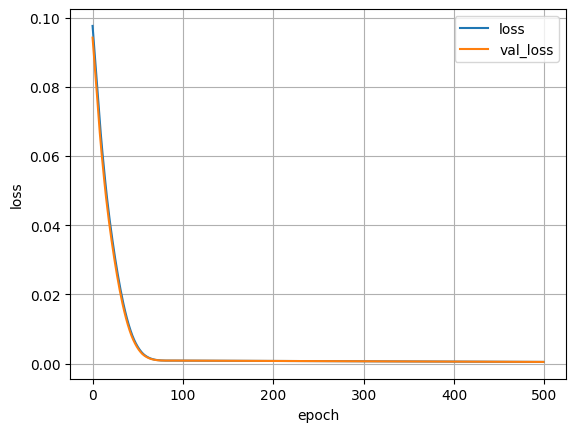

In [39]:
model.fit(X, Y,
          epochs=500,
          validation_data=(X, Y),
          callbacks=[plot_losses],
          verbose=0)

In [40]:
# evaluate the keras model
# Evalusi hasil proses pelatihan Deep Learning
# Hitung akurasi hasil pelatihan dalam bentuk Prosentase Keberhasilan
# Prosentase Keberhasilan = 100 - MAPE

#_, MAPE_pelatihan = model.evaluate(X_normal, Y_normal, batch_size=1)

_, MSE = model.evaluate(X, Y, batch_size=1)

#print('Prosentase_keberhasilan: %.2f' % (100-MAPE_pelatihan))

print('MSE : %.2f' % (MSE))


2/2 [==============================] - 0s 3ms/step - loss: 4.9206e-04 - mean_squared_error: 4.9206e-04
MSE : 0.00


In [41]:
# menjalankan fungsi prediksi
y_pred = model.predict(X)
print(y_pred)

1/1 [==============================] - 0s 50ms/step
[[0.25003025]
 [0.25814924]]


In [42]:
# Denormalisasi Data sebelum dibandngkan

a = np.max(TPT)
b = np.min(TPT)

# Rumus
# x_denormalisasi = (((x_normalisasi - 0.1)*(a - b))/0.8) + b

y_prediksi = (((y_pred - 0.1)*(a - b))/0.8) + b

print("y_prediksi =", y_prediksi)

y_prediksi = [[6.167713]
 [6.224952]]


In [43]:
# Urut tahun, menggantikan indeks dari 0 s.d 1
urutan1 = ['2020',
       '2021'
       ]

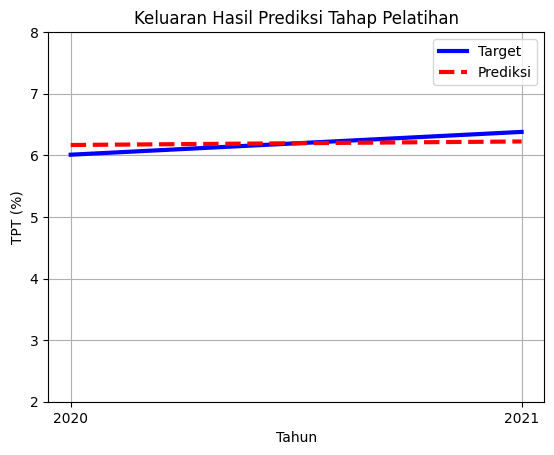

In [44]:
# Plot Keluaran Hasil Prediksi Tahap Pelatihan

plt.title('Keluaran Hasil Prediksi Tahap Pelatihan')
plt.plot(urutan1, TPT_Target, '-b', label='Target',linewidth=3, markersize=12)
plt.plot(urutan1, y_prediksi, '--r', label='Prediksi', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('TPT (%)')
plt.ylim((2,8))
plt.grid()

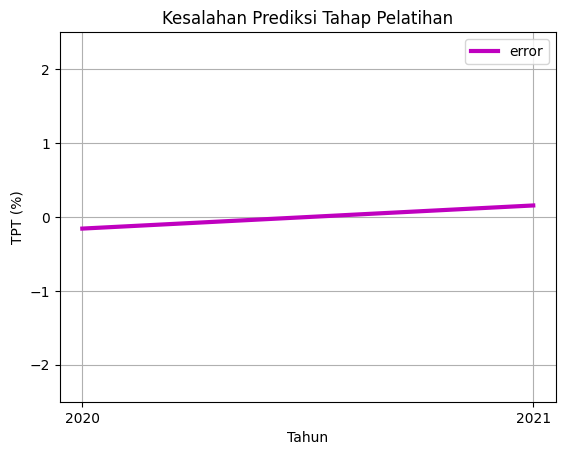

In [45]:
# Plot Kesalahan Prediksi

selisih = TPT_Target - y_prediksi.transpose()
plt.title('Kesalahan Prediksi Tahap Pelatihan')
plt.plot(urutan1, selisih.transpose(), '-m', label='error', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('TPT (%)')
plt.ylim((-2.5,2.5))
plt.grid()

In [46]:
# Pengukuran kinerja Deep Learning

from sklearn.metrics import mean_squared_error
from math import sqrt
mse  = mean_squared_error(TPT_Target, y_prediksi)
rmse = sqrt(mse)
print("mse =",mse)
print("rmse =",rmse)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE = mean_absolute_percentage_error(TPT_Target, y_prediksi)
print("MAPE =",MAPE)

Persentase_keberhasilan = 100-MAPE
print("Persentase_keberhasilan =", Persentase_keberhasilan)

mse = 0.024456628151147942
rmse = 0.15638615076517468
MAPE = 2.9895877514056926
Persentase_keberhasilan = 97.0104122485943


# Prediksi TPT
# Tahap Pengujian

Input : mulai tahun 1999 sampai tahun 2018

Untuk Memprediksi TPT di Tahun 2019 dan 2020

In [47]:
# Urut tahun, menggantikan indeks dari 0 s.d 1
urutan2 = ['2022',
       '2023'
       ]

In [48]:
# Ujicoba prediksi
y_uji = model.predict(X1)
print('Hasil prediksi sebelum denormalisasi =', y_uji)

1/1 [==============================] - 0s 18ms/step
Hasil prediksi sebelum denormalisasi = [[0.2811835]
 [0.2757826]]


In [49]:
# Denormalisasi Data sebelum dibandngkan

a = np.max(TPT)
b = np.min(TPT)

# Rumus
# x_denormalisasi = (((x_normalisasi - 0.1)*(a - b))/0.8) + b

y_pengujian = (((y_uji - 0.1)*(a - b))/0.8) + b

print("y_pengujian =", y_pengujian)

y_pengujian = [[6.387344 ]
 [6.3492675]]


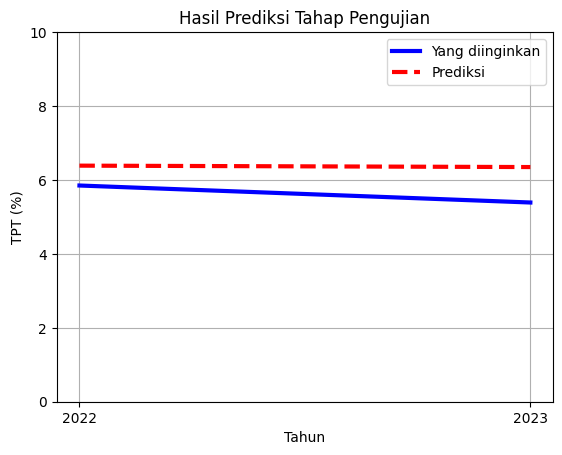

In [50]:
# Plot keluaran hasil prediksi Tahap Pengujian

plt.title('Hasil Prediksi Tahap Pengujian')
plt.plot(urutan2,  TPT_Target_Uji, '-b', label='Yang diinginkan',linewidth=3, markersize=12)
plt.plot(urutan2, y_pengujian, '--r', label='Prediksi', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('TPT (%)')
plt.ylim((0,10))
plt.grid()

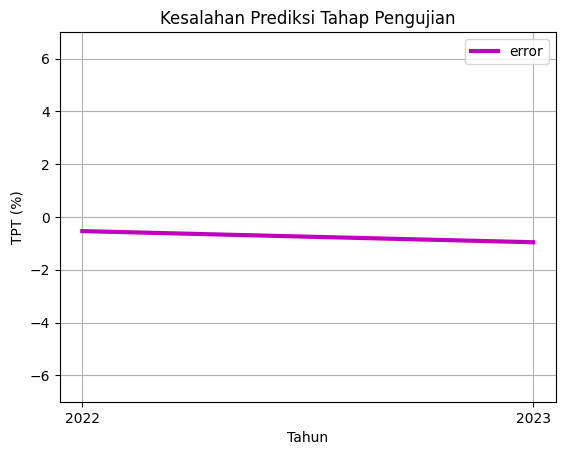

In [51]:
# Plot kesalahan prediksi Tahap Pengujian

selisih_pengujian = TPT_Target_Uji - y_pengujian.transpose()
plt.title('Kesalahan Prediksi Tahap Pengujian')
plt.plot(urutan2, selisih_pengujian.transpose(), '-m', label='error', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Tahun')
plt.ylabel('TPT (%)')
plt.ylim((-7,7))
plt.grid()

In [52]:
# Pengukuran kinerja Deep Learning Tahap Pengujian

from sklearn.metrics import mean_squared_error
from math import sqrt
mse1  = mean_squared_error(TPT_Target_Uji, y_pengujian)
rmse1 = sqrt(mse1)
print("mse =",mse1)
print("rmse =",rmse1)

MAPE = mean_absolute_percentage_error(TPT_Target_Uji, y_pengujian)
print("MAPE =",MAPE)

Persentase_keberhasilan = 100-MAPE
print("Persentase_keberhasilan =", Persentase_keberhasilan)

mse = 0.6044662763131923
rmse = 0.7774742930240152
MAPE = 13.505154969551864
Persentase_keberhasilan = 86.49484503044813
